## Imports 

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

## Dataset

In [126]:
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Nettoyer le dataset

In [127]:
# drop columns City Name
pumpkins = pumpkins.drop(['City Name', 'Type', 'Variety', 'Sub Variety', 'Grade', 'Mostly Low', 'Mostly High', 'Origin', 'Origin District', 'Item Size', 'Color', 'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop', 'Trans Mode', 'Repack', 'Unnamed: 24', 'Unnamed: 25'], axis=1)


In [128]:
pumpkins.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


## Convertir la date en format 365

In [129]:
# show the date column
pumpkins['Date']
#create a new column called date_daily
pumpkins['date_daily'] = pd.to_datetime(pumpkins['Date'])
#show the new column
pumpkins['date_daily']
#transform data from date_daily to 365 days date format
pumpkins['date_daily'] = pumpkins['date_daily'].dt.dayofyear
#show date_daily and the date column
pumpkins[['date_daily', 'Date']]


,date_daily,Date
0,119,4/29/17
1,126,5/6/17
2,268,9/24/16
3,268,9/24/16
4,310,11/5/16
...,...,...
1752,274,9/30/16
1753,270,9/26/16
1754,271,9/27/16
1755,272,9/28/16


## Faire la moyenne des prix

In [130]:
#create a new column called average_price
pumpkins['average_price'] = (pumpkins['High Price'] + pumpkins['Low Price']) / 2
pumpkins[['High Price', 'Low Price', 'average_price']]

,High Price,Low Price,average_price
0,280.00,270.00,275.00
1,280.00,270.00,275.00
2,160.00,160.00,160.00
3,160.00,160.00,160.00
4,100.00,90.00,95.00
...,...,...,...
1752,14.75,14.75,14.75
1753,275.00,275.00,275.00
1754,275.00,275.00,275.00
1755,275.00,275.00,275.00


Supprimer les lignes

## Supprimer les unités peu utilisées

In [131]:
pumpkins = pumpkins[pumpkins['Package'] != '20 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '35 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != 'bushel cartons']
pumpkins = pumpkins[pumpkins['Package'] != '40 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '1 1/9 bushel crates']
pumpkins = pumpkins[pumpkins['Package'] != 'each']
pumpkins = pumpkins[pumpkins['Package'] != 'bins']
pumpkins = pumpkins[pumpkins['Package'] != '50 lb sacks']
pumpkins = pumpkins[pumpkins['Package'] != 'bushel baskets']
pumpkins = pumpkins[pumpkins['Package'] != '22 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '50 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '20 lb cartons']

pumpkins['Package'].value_counts()

36 inch bins            663
24 inch bins            551
1/2 bushel cartons      234
1 1/9 bushel cartons    117
Name: Package, dtype: int64

## Séparer les valeurs

In [132]:
X = pumpkins['date_daily'].to_numpy().reshape(-1,1)
y = pumpkins['average_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lin_reg = LinearRegression().fit(X_train,y_train)


## Calculs des indicateurs

In [133]:
pred = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {rmse:3.3} ({rmse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 84.2 (60.1%)
Model determination:  0.02745797623960744


## Créer le graphique

## Linear :

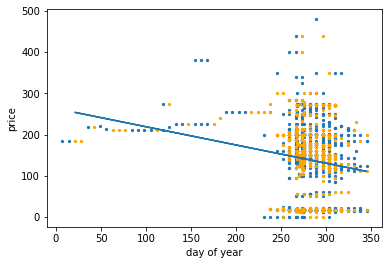

In [134]:
plt.scatter(X_train,y_train, s = 5) #Training data
plt.scatter(X_test,y_test, color = "orange", s = 5) #Test data
plt.plot(X_test, pred) #Regression line
plt.xlabel("day of year")
plt.ylabel("price")
plt.show()

## Polynomial : 

Mean error: 81.9 (59.7%)
Model determination:  0.033745795926543476


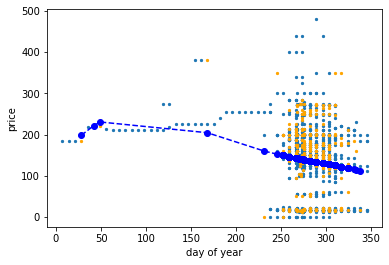

In [135]:
#Seperating input and output
X = pumpkins['date_daily'].to_numpy().reshape(-1,1)
y = pumpkins['average_price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_train,y_train, s = 5) #Training data
plt.scatter(X_test,y_test, color = "orange", s = 5) #Test data
reg_x, reg_y = zip(*sorted(zip(X_test[:,0], pred))) #Sorting data to get a nice plot
plt.plot(reg_x, reg_y, '--bo') #Regression line
plt.xlabel("day of year")
plt.ylabel("price")
plt.show()
